# Model Interpretability

##Abstract
In this notebook we will try to interpret the various models we have used in our previous notebooks on the crypto market prices dataset. Model Interpretability has emerged as a crucial area of research and practice in the field of machine learning and artificial intelligence. It refers to the ability to understand and explain the decisions made by complex models, which is essential for ensuring transparency, trust, and accountability in AI systems.

The data we are dealing with consists of crypto token and their prices over a range of time. The nature of the data is of time series and is usually quite difficult to interpret as markets tend to be baised towards the latest markte trends and most importantly to human sentiments. Sentiment Analysis is another field of machine learning whihc can be used to improve accuracy of the model and the prediction but for the scope of this notebook we will strictly focus on a idealistic model that can be replicated and how it will be construed against the test data.

Various techniques have been developed to enhance the interpretability of machine learning models, including feature importance analysis, surrogate models, LIME (Local Interpretable Model-agnostic Explanations), SHAP (SHapley Additive exPlanations), and attention mechanisms in deep learning. These methods aim to uncover the factors driving model predictions and provide human-understandable explanations.







#Linear Regression
Let's start with the first model that we will apply to our time series data. We cna use a linaer regression model to predict our `close` value for the testing dataset.

To implement a Linear Regression, we need to first load the dataset and split it accordingly.

In [61]:
!pip install shap

In [62]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split

cryptoDF = pd.read_csv("https://media.githubusercontent.com/media/sampurng/INFO6105/main/crypto-markets.csv")
cryptoDF.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


Now we have laoded our dataset, we can now split it into testing and training data accordingly.

In [63]:
btcDF = cryptoDF[cryptoDF["symbol"] == "BTC"]
btcDF

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43


In [64]:
X = cryptoDF[["open", "high", "low", "market", "close_ratio", "volume", "spread"]]
y = cryptoDF[["close"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now that we have divided our respective datasets for `bitcoin` we can run our linear regression model to get a sense of the model.

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3003404.4394878526
R-squared Score: 0.9837624313978162


We can obsereve the $(R)^2$ score and the $(MSE)$ score for the linear regression model. To visualize this, we can use the help of matplotlib to get a better understanding and overview of the model and help ourselves in intepretting it. We can also use Cross Validation and VIF to interpret our linear model.

In [66]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lin_model, X, y, cv=5)
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean CV R^2 Score:", cv_scores.mean())


Cross-Validation R^2 Scores: [-15.20108113  -4.51876827   0.98041958   0.98583473   0.97205111]
Mean CV R^2 Score: -3.3563087962117564


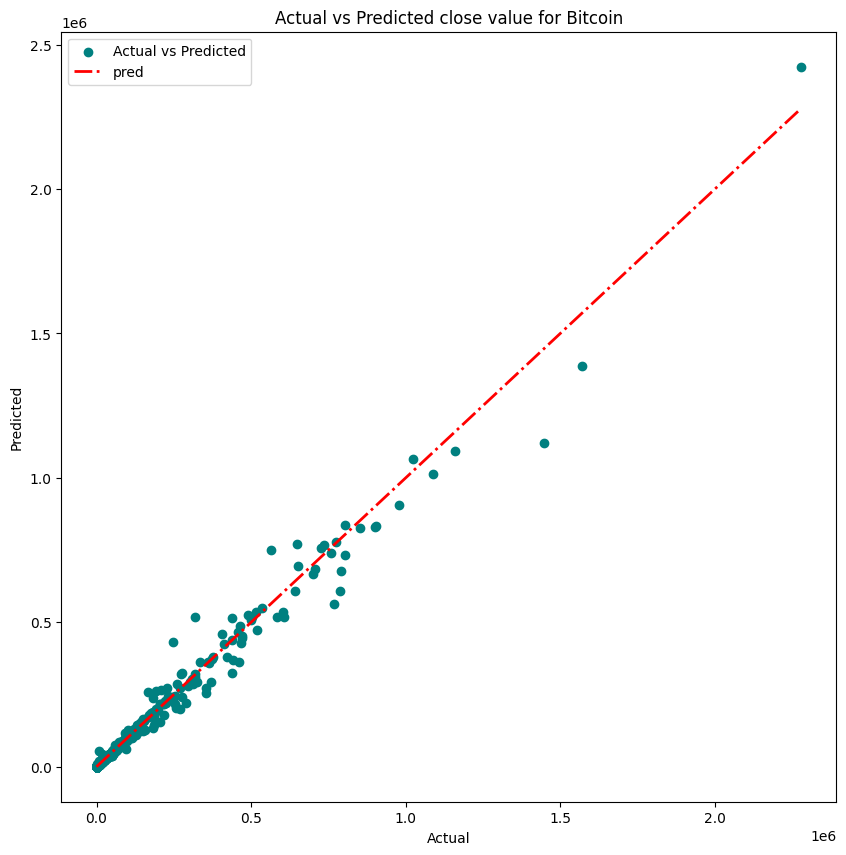

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='teal', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashdot', lw=2, label='pred')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted close value for Bitcoin')
plt.legend()
plt.show()


#Random Forest
For our tree based model,we are going to use a random forest as decision trees are prone to overfitting and the data is vast in nature. We are gonna use a random forest model and use metrics like $(MSE), (Confusin Matrix), (R^2)$ to determine its accuracy and try to intepret the model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=25, max_depth=5, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared Score:", r2_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Here we have redcued the number of estimators and the maximum depth aloowed for the random forest trees in order to speed up the execution time, as creating the random forest model takes in all predictor variable permutations to create a perfect model that can classify without overfitting.

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_test.columns, class_names=["close"])
plt.title("Decision Tree from Random Forest")
plt.show()


#Auto ML
For the AutoML library, we can use H2O to determine the best model for our given data.

In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
btcDF = h2o.import_file("https://media.githubusercontent.com/media/sampurng/INFO6105/main/crypto-markets.csv")
btcDF = btcDF[btcDF["symbol"] == "BTC"]
btcTrain, btcTest = btcDF.split_frame(ratios=[0.8])
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=25, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=["open", "high", "low", "volume", "market", "close_ratio", "spread"], y="close", training_frame=btcTrain)


In [ ]:
aml.leaderboard

As we can see int he above results obtained with the H2o.ai Auto ML models, we have the respective models that have been used by the AutoML library and the residuals of each of those models, specifically, we get to see how each model performs on the basis of the following:
##- MAE (Mean Average Error)

##- MSE (Mean Squared Error)

##- RMSE (Root mean Sqaured Error)

##- RMSLE (Root mean Squared Logarithmic Error)

##- Mean Residual Deviance

With these parameters in mind the best model that we can obtain from the following is a Gradient Boost Machine algorithm that performs the best.


#SHAP Analysis
With these three regression, tree and Boost based models, there are a few problems that we encounter when interpretting their outcomes. A few problems listed with these are as follows:


Linear Regression:
1. Limited Complexity: Linear regression models have limited complexity compared to other models, making them more interpretable by default. However, they may not capture complex nonlinear relationships in the data.

2. Feature Importance: In linear regression, you can interpret feature importance based on the coefficients assigned to each feature. Higher coefficients indicate stronger influence on the target variable.


Random Forest:
1. Ensemble of Trees: Random Forest is an ensemble of decision trees, which can make it less interpretable compared to linear models. It's challenging to directly interpret individual trees in the ensemble.

2. Feature Importance: Random Forest provides feature importance scores based on how much each feature reduces impurity across all decision trees. Higher scores indicate more important features.


Gradient Boosting:
1. Complexity: Gradient Boosting models, such as XGBoost or LightGBM, can be highly accurate but also complex. They involve sequential addition of decision trees, which makes interpretation challenging.

2. Feature Importance: Similar to Random Forest, Gradient Boosting models provide feature importance scores based on the contribution of each feature to reducing the loss function. Higher scores indicate more important features.


To encounter all these problems we can use `Shapely Additive Explanations` which tremendeously increase the interpretability of any model.


## Linear Regression
To find out the SHAP values for the linear model used above, we can do the following

In [ ]:
import shap

explainer = shap.LinearExplainer(lin_model, X_train)

shap_values = explainer.shap_values(X_train.iloc[0])


shap.waterfall_plot(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_train.iloc[0]), max_display=10)

shap_values = explainer.shap_values(X_train)

explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_train)


shap.plots.beeswarm(explanation, max_display=10)


Here we can see the feature varaibles and how much their impact is on teh target variable `close`.

#Random Forest
For the random forest tree absed algorithm we can again calculate the SHAP values and determine the importance of our features. This helps us interpret the model in a better way than VIF and PDP plots.


In [ ]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")


#Gradient Boosting Machine


In [ ]:
best_model = aml.get_best_model()

shap_values = best_model.predict_contributions(btcTrain)

best_model.shap_summary_plot(btcTrain)



#Conclusion

SHAP (SHapley Additive exPlanations) values provide a powerful method for interpreting machine learning models, especially complex models like ensemble methods (e.g., random forests, gradient boosting)

SHAP values offer a more nuanced understanding of feature importance compared to traditional methods like coefficients in linear models or feature importances in tree-based models. They provide feature contributions to individual predictions, taking into account interactions and dependencies among features.

SHAP values can be aggregated across all instances to provide a global view of feature importance. This helps identify which features are consistently impactful across the entire dataset and contribute significantly to the model's predictions.


#Licences


1. [H2o.AI](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)
2. [Pandas 1.4](https://pandas.pydata.org/docs/getting_started/overview.html)
3. [Kaggle Dataset](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies/)
4. [SkLearn Estimators](https://scikit-learn.org/stable/developers/develop.html)


MIT License

Copyright (c) 2023 Sampurna

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


##References
1. [Conor O'Sullivan - Introduction to SHAP with Python ](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
2. [AI Skunks]( https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb )
3. [ChatGPT](https://chat.openai.com/)


